In [1]:
import time
from tqdm.notebook import tqdm
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from itertools import product
import networkx as nx

from utilities.nn_utils import *
from utilities.data_augmenting import process_date_group

from IPython.display import display, Markdown

from pprint import pprint

In [2]:
data_path = Path("/Users/adamsulik/Workspace/qrt_datachallenge/data")

output_storage_path = data_path.parent / 'outputs' / 'nn_augmented'
output_storage_path.mkdir(exist_ok=True, parents=True)

# Read the data

In [3]:
x_train = pd.read_csv(data_path / 'x_train_Lafd4AH.csv', index_col='ID')
y_train = pd.read_csv(data_path / 'y_train_JQU4vbI.csv', index_col='ID')
train = pd.concat([x_train, y_train], axis=1)
test = pd.read_csv(data_path / 'x_test_c7ETL4q.csv', index_col='ID')
train.head()

,DATE,STOCK,INDUSTRY,INDUSTRY_GROUP,SECTOR,SUB_INDUSTRY,RET_1,VOLUME_1,RET_2,VOLUME_2,...,VOLUME_16,RET_17,VOLUME_17,RET_18,VOLUME_18,RET_19,VOLUME_19,RET_20,VOLUME_20,RET
ID,,,,,,,,,,,,,,,,,,,,,
0,0,2,18,5,3,44,-0.015748,0.147931,-0.015504,0.179183,...,0.630899,0.003254,-0.379412,0.008752,-0.110597,-0.012959,0.174521,-0.002155,-0.000937,True
1,0,3,43,15,6,104,0.003984,NaN,-0.090580,NaN,...,NaN,0.003774,NaN,-0.018518,NaN,-0.028777,NaN,-0.034722,NaN,True
2,0,4,57,20,8,142,0.000440,-0.096282,-0.058896,0.084771,...,-0.010336,-0.017612,-0.354333,-0.006562,-0.519391,-0.012101,-0.356157,-0.006867,-0.308868,False
3,0,8,1,1,1,2,0.031298,-0.429540,0.007756,-0.089919,...,0.012105,0.033824,-0.290178,-0.001468,-0.663834,-0.013520,-0.562126,-0.036745,-0.631458,False
4,0,14,36,12,5,92,0.027273,-0.847155,-0.039302,-0.943033,...,-0.277083,-0.012659,0.139086,0.004237,-0.017547,0.004256,0.579510,-0.040817,0.802806,False


# Feature Engineering

In [7]:
# Process train data
t_34 = 5
halflife = np.log(2) / np.log(4/3) * t_34


train_processed_savepath = output_storage_path / 'preprocessed_x_train.h5'

groups_train = x_train.groupby('DATE')
groups_processed = []

for date, group_df in tqdm(groups_train):
    print('Date: ', date)
    group_df = group_df.copy()
    group_df = process_date_group(group_df, halflife=halflife, distance_method='dist')
    groups_processed.append(group_df)
pd.concat(groups_processed).to_hdf(train_processed_savepath, key='preprocessed_train')
print(f'Saved to {train_processed_savepath}')

  0%|          | 0/156 [00:00<?, ?it/s]

Date:  0
First eigvec explains 28.71%
Second eigvec explains 7.79%
Date:  1
First eigvec explains 34.41%
Second eigvec explains 6.27%
Date:  4
First eigvec explains 26.45%
Second eigvec explains 7.28%
Date:  5
First eigvec explains 47.23%
Second eigvec explains 4.48%
Date:  6
First eigvec explains 29.98%
Second eigvec explains 6.21%
Date:  7
First eigvec explains 24.36%
Second eigvec explains 7.06%
Date:  9
First eigvec explains 33.88%
Second eigvec explains 9.43%
Date:  10
First eigvec explains 21.45%
Second eigvec explains 9.01%
Date:  11
First eigvec explains 25.20%
Second eigvec explains 8.37%
Date:  14
First eigvec explains 24.90%
Second eigvec explains 7.19%
Date:  18
First eigvec explains 39.07%
Second eigvec explains 6.26%
Date:  19
First eigvec explains 22.98%
Second eigvec explains 6.86%
Date:  20
First eigvec explains 26.37%
Second eigvec explains 9.92%
Date:  21
First eigvec explains 14.14%
Second eigvec explains 8.41%
Date:  22
First eigvec explains 36.73%
Second eigvec ex

/var/folders/4j/_p_42xsd5395pr3dqwmj_03m0000gn/T/ipykernel_34605/465346956.py:16: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block3_values] [items->Index(['Group_ret_1', 'Group_ret_2', 'Group_ret_3', 'Group_ret_4',
       'Group_ret_5'],
      dtype='object')]

  pd.concat(groups_processed).to_hdf(train_processed_savepath, key='preprocessed_train')


In [8]:
# Process test data
t_34 = 5
halflife = np.log(2) / np.log(4/3) * t_34
test_processed_savepath = output_storage_path / 'preprocessed_x_test.h5'

groups_test = test.groupby('DATE')
groups_processed = []

for date, group_df in tqdm(groups_test):
    print('Date: ', date)
    group_df = group_df.copy()
    group_df = process_date_group(group_df, halflife=halflife, distance_method='dist')
    groups_processed.append(group_df)
pd.concat(groups_processed).to_hdf(test_processed_savepath, key='preprocessed_test')
print(f'Saved to {test_processed_savepath}')

  0%|          | 0/68 [00:00<?, ?it/s]

Date:  2
First eigvec explains 32.40%
Second eigvec explains 6.56%
Date:  3
First eigvec explains 35.82%
Second eigvec explains 8.12%
Date:  8
First eigvec explains 26.67%
Second eigvec explains 9.18%
Date:  12
First eigvec explains 13.83%
Second eigvec explains 8.96%
Date:  13
First eigvec explains 41.55%
Second eigvec explains 5.94%
Date:  15
First eigvec explains 37.03%
Second eigvec explains 9.51%
Date:  16
First eigvec explains 14.10%
Second eigvec explains 9.25%
Date:  17
First eigvec explains 33.00%
Second eigvec explains 6.62%
Date:  23
First eigvec explains 27.24%
Second eigvec explains 4.21%
Date:  24
First eigvec explains 17.03%
Second eigvec explains 7.97%
Date:  26
First eigvec explains 36.87%
Second eigvec explains 9.20%
Date:  27
First eigvec explains 50.30%
Second eigvec explains 5.71%
Date:  29
First eigvec explains 40.83%
Second eigvec explains 7.08%
Date:  30
First eigvec explains 43.47%
Second eigvec explains 5.84%
Date:  31
First eigvec explains 60.79%
Second eigve

/var/folders/4j/_p_42xsd5395pr3dqwmj_03m0000gn/T/ipykernel_34605/3806356929.py:42: RuntimeWarning: invalid value encountered in scalar divide
  corr = cov / (stds[i] * stds[j])


First eigvec explains 24.84%
Second eigvec explains 7.36%
Date:  63
First eigvec explains 33.01%
Second eigvec explains 6.08%
Date:  66
First eigvec explains 51.94%
Second eigvec explains 5.01%
Date:  72
First eigvec explains 41.34%
Second eigvec explains 6.15%
Date:  73
First eigvec explains 70.24%
Second eigvec explains 4.45%
Date:  78
First eigvec explains 40.65%
Second eigvec explains 6.70%
Date:  79
First eigvec explains 23.84%
Second eigvec explains 8.28%
Date:  83
First eigvec explains 15.41%
Second eigvec explains 9.41%
Date:  87
First eigvec explains 41.97%
Second eigvec explains 2.66%
Date:  95
First eigvec explains 39.78%
Second eigvec explains 6.18%
Date:  102
First eigvec explains 28.80%
Second eigvec explains 8.26%
Date:  106
First eigvec explains 36.11%
Second eigvec explains 11.26%
Date:  112
First eigvec explains 28.39%
Second eigvec explains 9.65%
Date:  113
First eigvec explains 39.04%
Second eigvec explains 6.25%
Date:  114
First eigvec explains 18.43%
Second eigvec

/var/folders/4j/_p_42xsd5395pr3dqwmj_03m0000gn/T/ipykernel_34605/1964281438.py:14: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block3_values] [items->Index(['Group_ret_1', 'Group_ret_2', 'Group_ret_3', 'Group_ret_4',
       'Group_ret_5'],
      dtype='object')]

  pd.concat(groups_processed).to_hdf(test_processed_savepath, key='preprocessed_test')


# Run the training

In [ ]:
SEED = 42
NUM_WORKERS = 10
BATCH_SIZE = 64
EPOCHS = 50
LR = 0.001
PRINT_EVERY = 5
DROPOUT = 0.4

device = 'cpu'

model_hidden_layers = [32, 16]
train_processed_savepath = output_storage_path / 'preprocessed_x_train.h5'
test_processed_savepath = output_storage_path / 'preprocessed_x_test.h5'


X_df = pd.read_hdf(train_processed_savepath).reset_index(drop=True)
x_train = pd.read_csv(data_path / 'x_train_Lafd4AH.csv', index_col='ID')
y_train = pd.read_csv(data_path / 'y_train_JQU4vbI.csv', index_col='ID')
X_df = X_df.reindex(x_train.index).fillna(0)

sorted_indices_by_date = X_df.sort_values(by=['DATE', 'STOCK']).index
X_df = X_df.reindex(sorted_indices_by_date)
y_train = y_train.reindex(sorted_indices_by_date)
dates_arr = X_df['DATE']


for backdate_range in [5, 10]:
    display(Markdown('---'))
    experiment_name = f'grouping_experiment_daysback-{backdate_range}'
    display(Markdown(f'# Experiment: {experiment_name}'))
    
    
    relevant_columns = [f'RET_{i}' for i in range(1, backdate_range+1)] + \
                       [f'VOLUME_{i}' for i in range(1, backdate_range+1)] + \
                       ['global_avg_1', 'global_avg_2'] + [f'Group_ret_{i}' for i in range(1, 6)]
    
    X = X_df[relevant_columns].values
    Y = y_train['RET'].astype(int).values
    
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)
    
    cv_results = run_k_fold_training(X, Y,
                                     random_seed=SEED,
                                     num_workers=NUM_WORKERS,
                                     epochs=EPOCHS,
                                     device=device,
                                     batch_size=BATCH_SIZE,
                                     model_hidden_layers=model_hidden_layers,
                                     dropout_rate=DROPOUT,
                                     split_type='date',
                                     date_array=dates_arr,
                                     lr=LR,
                                     print_every_epoch=PRINT_EVERY,
                                    )

In [ ]:
# store cross validation results
cv_results = pd.DataFrame(cv_results).set_index('fold')
cv_results.to_csv(output_storage_path / f'{experiment_name}.csv')

avg_acc = cv_results['accuracy'].mean()
std_acc = cv_results['accuracy'].std()

upper_bound_acc = avg_acc + std_acc
lower_bound_acc = avg_acc - std_acc

print(f'Accuracy: {avg_acc:.5f} [{lower_bound_acc:.5f}; {upper_bound_acc:.5f}] (+- {std_acc:.6f}), based on 4 kfolds')


# Full dataset training

/var/folders/4j/_p_42xsd5395pr3dqwmj_03m0000gn/T/ipykernel_36090/115694205.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_df = X_df.reindex(x_train.index).fillna(0)


---

# Experiment: grouping_fulldataset_daysback-5

Training 1/4

10:20:21	  -- Epoch 5: 	Training Loss = 0.6925 | Training Accuracy = 0.5142 | Validation Loss = 0.6926 | Validation Accuracy = 0.5134
10:22:08	  -- Epoch 10: 	Training Loss = 0.6922 | Training Accuracy = 0.5177 | Validation Loss = 0.6927 | Validation Accuracy = 0.5120
10:23:57	  -- Epoch 15: 	Training Loss = 0.6921 | Training Accuracy = 0.5195 | Validation Loss = 0.6925 | Validation Accuracy = 0.5167
10:25:46	  -- Epoch 20: 	Training Loss = 0.6919 | Training Accuracy = 0.5207 | Validation Loss = 0.6928 | Validation Accuracy = 0.5132
10:27:36	  -- Epoch 25: 	Training Loss = 0.6919 | Training Accuracy = 0.5212 | Validation Loss = 0.6928 | Validation Accuracy = 0.5158
10:29:25	  -- Epoch 30: 	Training Loss = 0.6918 | Training Accuracy = 0.5222 | Validation Loss = 0.6926 | Validation Accuracy = 0.5165
10:31:13	  -- Epoch 35: 	Training Loss = 0.6918 | Training Accuracy = 0.5218 | Validation Loss = 0.6933 | Validation Accuracy = 0.5114
10:33:03	  -- Epoch 40: 	Training Loss = 0.6918 | Traini

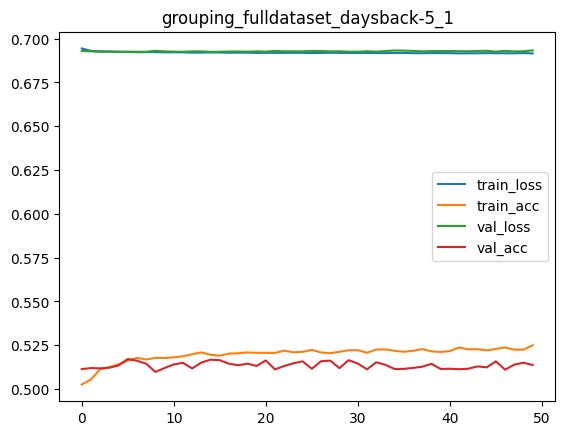

---

# Experiment: grouping_fulldataset_daysback-5

Training 2/4

10:38:34	  -- Epoch 5: 	Training Loss = 0.6926 | Training Accuracy = 0.5152 | Validation Loss = 0.6929 | Validation Accuracy = 0.5149
10:40:25	  -- Epoch 10: 	Training Loss = 0.6924 | Training Accuracy = 0.5175 | Validation Loss = 0.6928 | Validation Accuracy = 0.5120
10:42:16	  -- Epoch 15: 	Training Loss = 0.6921 | Training Accuracy = 0.5191 | Validation Loss = 0.6927 | Validation Accuracy = 0.5148
10:44:05	  -- Epoch 20: 	Training Loss = 0.6920 | Training Accuracy = 0.5213 | Validation Loss = 0.6928 | Validation Accuracy = 0.5140
10:45:54	  -- Epoch 25: 	Training Loss = 0.6920 | Training Accuracy = 0.5201 | Validation Loss = 0.6933 | Validation Accuracy = 0.5065
10:47:44	  -- Epoch 30: 	Training Loss = 0.6919 | Training Accuracy = 0.5208 | Validation Loss = 0.6927 | Validation Accuracy = 0.5159
10:49:32	  -- Epoch 35: 	Training Loss = 0.6918 | Training Accuracy = 0.5226 | Validation Loss = 0.6933 | Validation Accuracy = 0.5137
10:51:21	  -- Epoch 40: 	Training Loss = 0.6918 | Traini

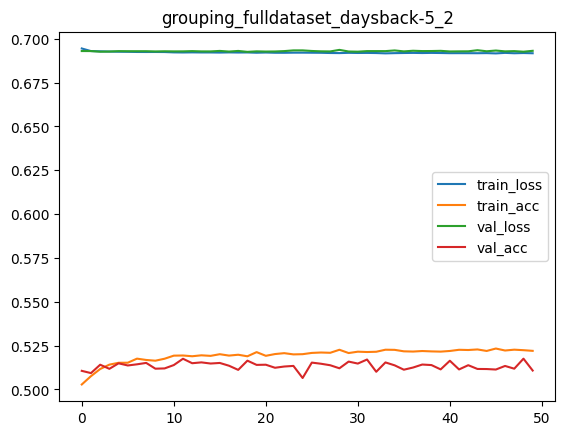

---

# Experiment: grouping_fulldataset_daysback-5

Training 3/4

10:56:43	  -- Epoch 5: 	Training Loss = 0.6926 | Training Accuracy = 0.5143 | Validation Loss = 0.6928 | Validation Accuracy = 0.5090
10:58:30	  -- Epoch 10: 	Training Loss = 0.6923 | Training Accuracy = 0.5181 | Validation Loss = 0.6926 | Validation Accuracy = 0.5159
11:00:17	  -- Epoch 15: 	Training Loss = 0.6921 | Training Accuracy = 0.5182 | Validation Loss = 0.6930 | Validation Accuracy = 0.5148
11:02:04	  -- Epoch 20: 	Training Loss = 0.6920 | Training Accuracy = 0.5204 | Validation Loss = 0.6926 | Validation Accuracy = 0.5138
11:03:52	  -- Epoch 25: 	Training Loss = 0.6920 | Training Accuracy = 0.5206 | Validation Loss = 0.6924 | Validation Accuracy = 0.5184
11:05:41	  -- Epoch 30: 	Training Loss = 0.6918 | Training Accuracy = 0.5219 | Validation Loss = 0.6927 | Validation Accuracy = 0.5136
11:07:33	  -- Epoch 35: 	Training Loss = 0.6918 | Training Accuracy = 0.5213 | Validation Loss = 0.6929 | Validation Accuracy = 0.5132
11:09:21	  -- Epoch 40: 	Training Loss = 0.6917 | Traini

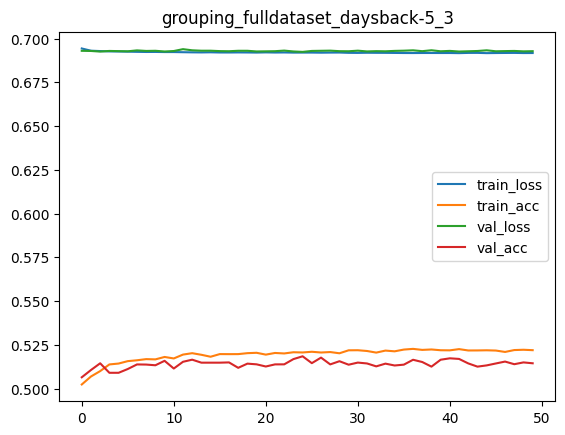

---

# Experiment: grouping_fulldataset_daysback-5

Training 4/4

11:14:47	  -- Epoch 5: 	Training Loss = 0.6926 | Training Accuracy = 0.5143 | Validation Loss = 0.6930 | Validation Accuracy = 0.5076
11:16:37	  -- Epoch 10: 	Training Loss = 0.6922 | Training Accuracy = 0.5185 | Validation Loss = 0.6928 | Validation Accuracy = 0.5120
11:18:28	  -- Epoch 15: 	Training Loss = 0.6921 | Training Accuracy = 0.5198 | Validation Loss = 0.6929 | Validation Accuracy = 0.5153
11:20:17	  -- Epoch 20: 	Training Loss = 0.6920 | Training Accuracy = 0.5208 | Validation Loss = 0.6930 | Validation Accuracy = 0.5136
11:22:06	  -- Epoch 25: 	Training Loss = 0.6919 | Training Accuracy = 0.5214 | Validation Loss = 0.6929 | Validation Accuracy = 0.5128
11:23:56	  -- Epoch 30: 	Training Loss = 0.6918 | Training Accuracy = 0.5219 | Validation Loss = 0.6934 | Validation Accuracy = 0.5164
11:25:48	  -- Epoch 35: 	Training Loss = 0.6918 | Training Accuracy = 0.5216 | Validation Loss = 0.6930 | Validation Accuracy = 0.5144
11:27:38	  -- Epoch 40: 	Training Loss = 0.6918 | Traini

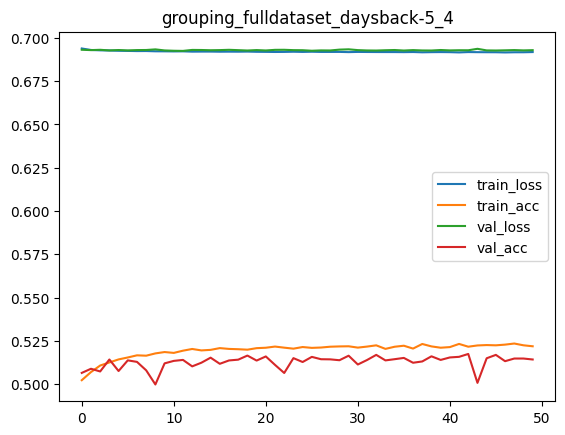

In [7]:
backdate_range = 5
SEED = 42
NUM_WORKERS = 10
BATCH_SIZE = 64
EPOCHS = 50
LR = 0.001
VAL_SPLIT = 0.1
PRINT_EVERY = 5
DROPOUT = [0.6, 0.4, 0.4]
NUM_MODELS = 4

model_hidden_layers = [64, 32, 16]
train_processed_savepath = output_storage_path / 'preprocessed_x_train.h5'
test_processed_savepath = output_storage_path / 'preprocessed_x_test.h5'


X_df = pd.read_hdf(train_processed_savepath).reset_index(drop=True)
x_train = pd.read_csv(data_path / 'x_train_Lafd4AH.csv', index_col='ID')
y_train = pd.read_csv(data_path / 'y_train_JQU4vbI.csv', index_col='ID')
X_df = X_df.reindex(x_train.index).fillna(0)

sorted_indices_by_date = X_df.sort_values(by=['DATE', 'STOCK']).index
X_df = X_df.reindex(sorted_indices_by_date)
y_train = y_train.reindex(sorted_indices_by_date)
dates_arr = X_df['DATE']

relevant_columns = [f'RET_{i}' for i in range(1, backdate_range+1)] + \
                   [f'VOLUME_{i}' for i in range(1, backdate_range+1)] + \
                   ['global_avg_1', 'global_avg_2'] + [f'Group_ret_{i}' for i in range(1, 6)]

X = X_df[relevant_columns].values
Y = y_train['RET'].astype(int).values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)


for train_iteration in range(1, NUM_MODELS+1):
    experiment_name = f'grouping_fulldataset_daysback-{backdate_range}'
    display(Markdown('---'))
    display(Markdown(f'# Experiment: {experiment_name}'))
    display(Markdown(f'Training {train_iteration}/{NUM_MODELS}'))
    
    
    model_checkpoint, model_stats_df = full_dataset_training(
        X=X, Y=Y,
        numerical_columns=list(X_df.columns),
        output_storage_path=output_storage_path,
        bestmodel_exp_name=experiment_name+f'_{train_iteration}',
        val_split=VAL_SPLIT,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        seed=SEED*train_iteration,
        lr=LR,
        model_hidden_layers=model_hidden_layers,
        dropout_rate=DROPOUT,
        split_type='date',
        date_array=dates_arr,
        print_every_epoch=PRINT_EVERY,
        crit_metric_name='f1_score'
    )
    
    pprint({
        c: model_checkpoint[c] for c in ['epoch', 'loss', 'val_loss', 'train_acc', 'val_acc', 'f1_score']
    })

    f, ax = plt.subplots()
    ax.set_title(experiment_name+f'_{train_iteration}')
    model_stats_df.plot(ax=ax)
    plt.show()

# Full dataset training and model evaluation

In [9]:
test_processed_savepath = output_storage_path / 'preprocessed_x_test.h5'
backdate_range = 5
model_hidden_layers = [64, 32, 16]

x_test_df = pd.read_hdf(test_processed_savepath)
x_test_df.index = test.index

experiment_name = f'grouping_fulldataset_daysback-{backdate_range}'
model_checkpoints = [output_storage_path / f'{experiment_name}_{i}.pt' for i in range(1, 5)]

relevant_columns = [f'RET_{i}' for i in range(1, backdate_range+1)] + \
                   [f'VOLUME_{i}' for i in range(1, backdate_range+1)] + \
                   ['global_avg_1', 'global_avg_2'] + [f'Group_ret_{i}' for i in range(1, 6)]

eval_indices_by_date = x_test_df.sort_values(by='DATE').index
x_test_df = x_test_df[relevant_columns].reindex(eval_indices_by_date).fillna(0)
X_eval = x_test_df.values.astype(float)

predictions_arr = []
for model_checkpoint in tqdm(model_checkpoints):
    predictions_arr.append(
        load_model_and_predict(model_checkpoint, X_eval, relevant_columns, batch_size=64, model_hidden_layers=model_hidden_layers)
    )

/var/folders/4j/_p_42xsd5395pr3dqwmj_03m0000gn/T/ipykernel_36090/3326982952.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test_df = x_test_df[relevant_columns].reindex(eval_indices_by_date).fillna(0)


  0%|          | 0/4 [00:00<?, ?it/s]

/Users/adamsulik/Workspace/qrt_datachallenge/notebooks/utilities/nn_utils.py:553: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_

In [11]:
preds_df = pd.DataFrame(index=x_test_df.index, columns=[f'preds_{i}' for i in range(1, 5)])
for i in range(4):
    preds_df[f'preds_{i+1}'] = predictions_arr[i]
(preds_df.mean(axis=1).rename('RET').reindex(test.index) > 0.5).to_frame().to_csv(output_storage_path / f'grouped_eigmeans_nn_{backdate_range}.csv')
preds_df

,preds_1,preds_2,preds_3,preds_4
ID,,,,
418595,0.517668,0.525952,0.521649,0.518990
420476,0.514734,0.526488,0.516238,0.518991
420477,0.512889,0.523642,0.516752,0.518913
420478,0.517881,0.525952,0.521843,0.519050
420479,0.518882,0.523839,0.521621,0.519066
...,...,...,...,...
615023,0.517739,0.527625,0.516068,0.519040
615024,0.494606,0.521417,0.496522,0.513993
615025,0.488522,0.519183,0.488938,0.515604


In [13]:
(preds_df.mean(axis=1).rename('RET').reindex(test.index) > 0.5).to_frame().value_counts()

RET  
True     178535
False     19894
Name: count, dtype: int64

# On classification trees

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from pathlib import Path

In [13]:
X_df = pd.read_hdf(train_processed_savepath).reset_index(drop=True)
x_train = pd.read_csv(data_path / 'x_train_Lafd4AH.csv', index_col='ID')
y_train = pd.read_csv(data_path / 'y_train_JQU4vbI.csv', index_col='ID')
X_df = X_df.reindex(x_train.index).fillna(0)

sorted_indices_by_date = X_df.sort_values(by=['DATE', 'STOCK']).index


backdate_range = 5

relevant_columns = [f'RET_{i}' for i in range(1, backdate_range+1)] + \
                   [f'VOLUME_{i}' for i in range(1, backdate_range+1)] + \
                   ['global_avg_1', 'global_avg_2'] + [f'Group_ret_{i}' for i in range(1, 6)]

X_df = X_df.reindex(sorted_indices_by_date)
y_train = y_train.reindex(sorted_indices_by_date)
X_train = X_df[relevant_columns].fillna(0)

# A quiet large number of trees with low depth to prevent overfits
rf_params = {
    'n_estimators': 500,
    'max_depth': 2**3,
    'random_state': 0,
    'n_jobs': -1
}

train_dates = train['DATE'].unique()
test_dates = test['DATE'].unique()

n_splits = 4
scores = []
models = []

splits = KFold(n_splits=n_splits, random_state=0,
               shuffle=True).split(train_dates)

for i, (local_train_dates_ids, local_test_dates_ids) in enumerate(splits):
    local_train_dates = train_dates[local_train_dates_ids]
    local_test_dates = train_dates[local_test_dates_ids]

    local_train_ids = train['DATE'].isin(local_train_dates)
    local_test_ids = train['DATE'].isin(local_test_dates)

    X_local_train = X_train.loc[local_train_ids]
    y_local_train = y_train.loc[local_train_ids]
    X_local_test = X_train.loc[local_test_ids]
    y_local_test = y_train.loc[local_test_ids]

    X_local_train = X_local_train.fillna(0)
    X_local_test = X_local_test.fillna(0)

    model = RandomForestClassifier(**rf_params)
    model.fit(X_local_train, y_local_train)

    y_local_pred = model.predict_proba(X_local_test)[:, 1]
    
    sub = train.loc[local_test_ids].copy()
    sub['pred'] = y_local_pred
    y_local_pred = sub.groupby('DATE')['pred'].transform(lambda x: x > x.median()).values

    models.append(model)
    score = accuracy_score(y_local_test, y_local_pred)
    scores.append(score)
    print(f"Fold {i+1} - Accuracy: {score* 100:.2f}%")

/var/folders/4j/_p_42xsd5395pr3dqwmj_03m0000gn/T/ipykernel_33570/704277614.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_df = X_df.reindex(x_train.index).fillna(0)
/Users/adamsulik/Workspace/qrt_datachallenge/.dcvenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold 1 - Accuracy: 51.33%


/Users/adamsulik/Workspace/qrt_datachallenge/.dcvenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold 2 - Accuracy: 50.57%


/Users/adamsulik/Workspace/qrt_datachallenge/.dcvenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold 3 - Accuracy: 50.70%


/Users/adamsulik/Workspace/qrt_datachallenge/.dcvenv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fold 4 - Accuracy: 51.66%


Accuracy: 51.07% [50.62 ; 51.51] (+- 0.45)


<Axes: >

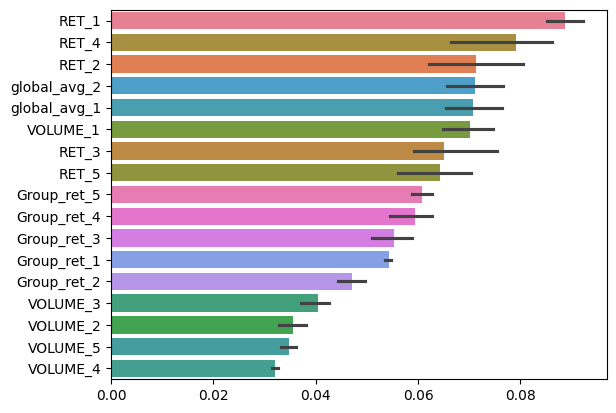

In [14]:
mean = np.mean(scores)*100
std = np.std(scores)*100
u = (mean + std)
l = (mean - std)
print(f'Accuracy: {mean:.2f}% [{l:.2f} ; {u:.2f}] (+- {std:.2f})')
feature_importances = pd.DataFrame([model.feature_importances_ for model in models], columns=relevant_columns)

sns.barplot(data=feature_importances, orient='h', order=feature_importances.mean().sort_values(ascending=False).index)

In [73]:
x_test_df = pd.read_hdf(test_processed_savepath)
x_test_df.index = test.index

X_test = x_test_df[relevant_columns]

rf_params['random_state'] = 0
model = RandomForestClassifier(**rf_params)
model.fit(X_train.fillna(0), y_train)
y_pred = model.predict_proba(X_test.fillna(0))[:, 1]

sub = test.copy()
sub['pred'] = y_pred
y_pred = sub.groupby('DATE')['pred'].transform(
    lambda x: x > x.median()).values

submission = pd.Series(y_pred)
submission.index = test.index
submission.name = 'RET'

submission.to_csv(output_storage_path / 'grouped_eigmeans_trees.csv', index=True, header=True)